In [122]:
import pandas as pd

In [123]:
df = pd.read_csv("tech_gadgets_data.csv")
df

,title,price,rating,reviews,availability,brand,category,off,bought
0,Lenovo V15 G4 AMD Ryzen 5 7520U 15.6 inch FHD ...,"34,990.00",3.0 out of 5 stars,1 rating,In stock,Lenovo,Laptop,-42%,Not Available
1,"Apple 2025 MacBook Air (13-inch, Apple M4 chip...","99,900.00",Previous page,NaN,In stock,Apple,Laptop,Not Available,Not Available
2,"Lenovo V15 G3 (2024), Intel Core i3 12th Gen 1...","32,980.00",4.2 out of 5 stars,4 ratings,In stock,Lenovo,Laptop,-60%,50+ bought in past month
3,"Acer Aspire Lite, AMD Ryzen 5 5625U Processor(...","34,490.00",4.0 out of 5 stars,"1,121 ratings",In stock,acer,Laptop,-42%,1K+ bought in past month
4,Lᥱnovo ThinkPad Touch Screen T490 Laptop Intᥱl...,"22,990.00",Previous page,NaN,In stock,Generic,Laptop,-8%,Not Available
...,...,...,...,...,...,...,...,...,...
259,Boult Q Over Ear Bluetooth Headphones with 70H...,"1,999.00",4.2 out of 5 stars,"1,939 ratings",In stock,Boult,HeadPhones,-67%,2K+ bought in past month
260,Sennheiser HD 599 Special Edition Wired Headph...,"8,990.00",4.5 out of 5 stars,"13,972 ratings",In stock,Sennheiser,HeadPhones,-57%,Not Available
261,Sennheiser HD 400s Over Ear Wired Headphones w...,"4,490.00",4.1 out of 5 stars,"4,126 ratings",In stock,Sennheiser,HeadPhones,-25%,100+ bought in past month
262,"boAt Rockerz 480 w/RGB LEDs, 6 Light Modes, 40...","1,499.00",3.9 out of 5 stars,472 ratings,In stock,boAt,HeadPhones,-60%,2K+ bought in past month


In [124]:
print("Initial Data Information:")
print(df.info())

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         264 non-null    object
 1   price         264 non-null    object
 2   rating        264 non-null    object
 3   reviews       241 non-null    object
 4   availability  262 non-null    object
 5   brand         264 non-null    object
 6   category      264 non-null    object
 7   off           264 non-null    object
 8   bought        264 non-null    object
dtypes: object(9)
memory usage: 18.7+ KB
None


In [125]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
                                               title      price  \
0  Lenovo V15 G4 AMD Ryzen 5 7520U 15.6 inch FHD ...  34,990.00   
1  Apple 2025 MacBook Air (13-inch, Apple M4 chip...  99,900.00   
2  Lenovo V15 G3 (2024), Intel Core i3 12th Gen 1...  32,980.00   
3  Acer Aspire Lite, AMD Ryzen 5 5625U Processor(...  34,490.00   
4  Lᥱnovo ThinkPad Touch Screen T490 Laptop Intᥱl...  22,990.00   

               rating        reviews availability    brand category  \
0  3.0 out of 5 stars       1 rating     In stock   Lenovo   Laptop   
1       Previous page            NaN     In stock    Apple   Laptop   
2  4.2 out of 5 stars      4 ratings     In stock   Lenovo   Laptop   
3  4.0 out of 5 stars  1,121 ratings     In stock     acer   Laptop   
4       Previous page            NaN     In stock  Generic   Laptop   

             off                    bought  
0           -42%             Not Available  
1  Not Available             Not Available  
2  

In [126]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
title            0
price            0
rating           0
reviews         23
availability     2
brand            0
category         0
off              0
bought           0
dtype: int64


In [127]:
# Remove rows with missing values in critical columns
df.dropna(subset=['title', 'price', 'brand', 'category'], inplace=True)

In [128]:
# Fill missing values in non-critical columns
df['rating'] = df['rating'].fillna('No rating')
df['reviews'] = df['reviews'].fillna(0)
df['availability'] = df['availability'].fillna('Not Available')
df['off'] = df['off'].fillna('No discount')
df['bought'] = df['bought'].fillna(0)

In [129]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [130]:
# Convert price to float
df['price'] = df['price'].str.replace(',', '').astype(float)

In [131]:
# Convert rating to float
df['rating'] = df['rating'].apply(lambda x: float(x.split(' ')[0]) if isinstance(x, str) and 'out of' in x else None)

In [132]:
df['rating'] = df['rating'].fillna(0)

In [133]:
# Convert reviews to int
import re

def extract_numeric(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value)
        return int(match.group()) if match else 0
    return value

df['reviews'] = df['reviews'].apply(extract_numeric)

In [134]:
# Convert bought to int
df['bought'] = df['bought'].apply(lambda x: extract_numeric(x) if x != 'Not Available' else 0)

In [135]:
# Convert discount to float
def convert_discount(value):
    if isinstance(value, str) and '%' in value:
        return float(value.strip('%'))
    elif value == 'No discount':
        return 0.0
    else:
        return None


In [136]:
df['off'] = df['off'].apply(convert_discount)

In [137]:
# Create a new column for discount amount
df['discount_amount'] = df.apply(lambda row: row['price'] * (row['off'] / 100) if pd.notnull(row['off']) else 0, axis=1)

In [138]:
df

,title,price,rating,reviews,availability,brand,category,off,bought,discount_amount
0,Lenovo V15 G4 AMD Ryzen 5 7520U 15.6 inch FHD ...,34990.0,3.0,1,In stock,Lenovo,Laptop,-42.0,0,-14695.8
1,"Apple 2025 MacBook Air (13-inch, Apple M4 chip...",99900.0,0.0,0,In stock,Apple,Laptop,NaN,0,0.0
2,"Lenovo V15 G3 (2024), Intel Core i3 12th Gen 1...",32980.0,4.2,4,In stock,Lenovo,Laptop,-60.0,50,-19788.0
3,"Acer Aspire Lite, AMD Ryzen 5 5625U Processor(...",34490.0,4.0,1,In stock,acer,Laptop,-42.0,1,-14485.8
4,Lᥱnovo ThinkPad Touch Screen T490 Laptop Intᥱl...,22990.0,0.0,0,In stock,Generic,Laptop,-8.0,0,-1839.2
...,...,...,...,...,...,...,...,...,...,...
257,Noise Two Wireless On-Ear Headphones with 50 H...,1499.0,3.5,3,In stock,Noise,HeadPhones,-70.0,500,-1049.3
258,OnePlus Bullets Wireless Z2 ANC Bluetooth in E...,1799.0,4.1,188,In stock,OnePlus,HeadPhones,-40.0,9,-719.6
260,Sennheiser HD 599 Special Edition Wired Headph...,8990.0,4.5,13,In stock,Sennheiser,HeadPhones,-57.0,0,-5124.3
261,Sennheiser HD 400s Over Ear Wired Headphones w...,4490.0,4.1,4,In stock,Sennheiser,HeadPhones,-25.0,100,-1122.5


In [139]:
cleaned_file_path = 'tech_gadgets_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

C:\Users\amart\AppData\Local\Temp\ipykernel_17136\1985243094.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_selling['title'], x=top_selling['bought'], palette="viridis")


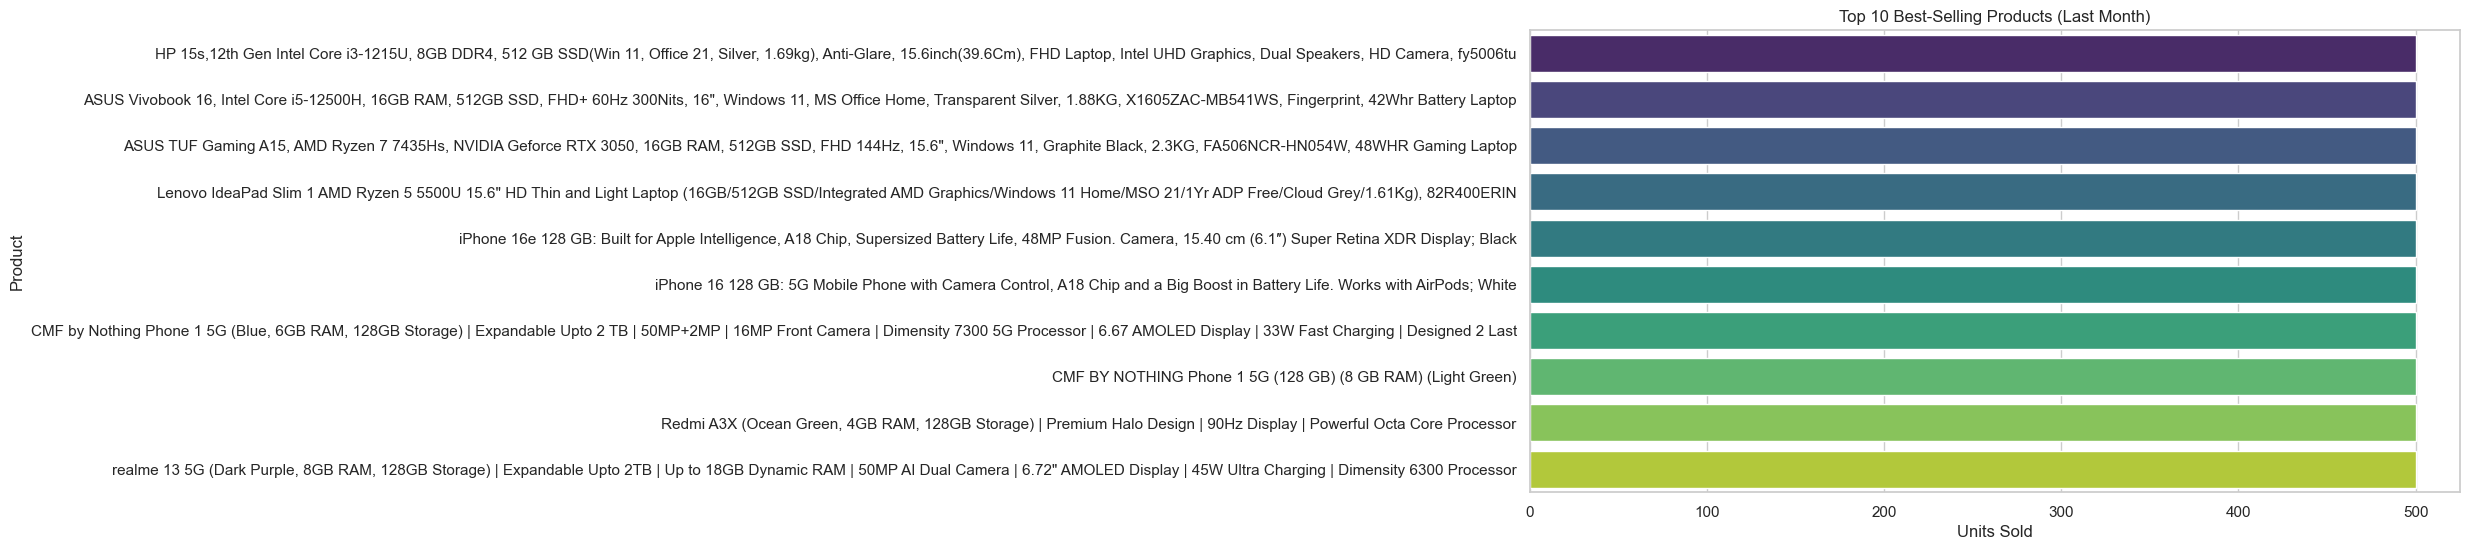

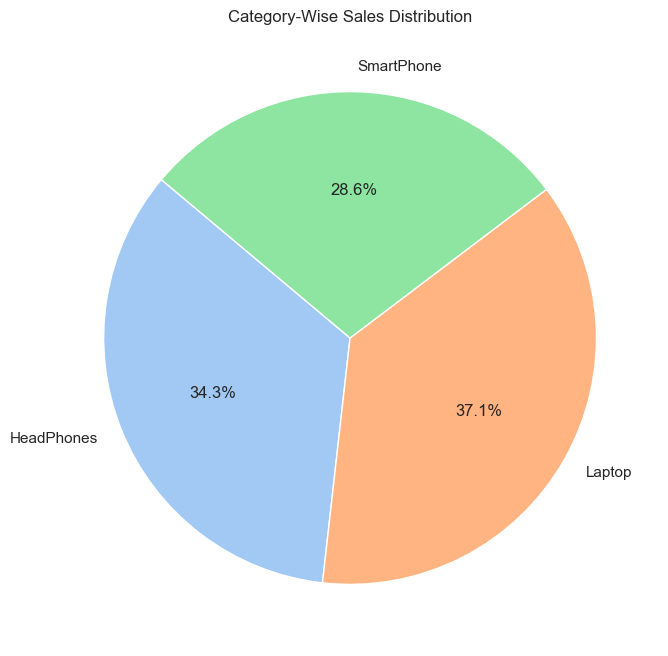

C:\Users\amart\AppData\Local\Temp\ipykernel_17136\1985243094.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_sales.index, y=brand_sales.values, palette="coolwarm")


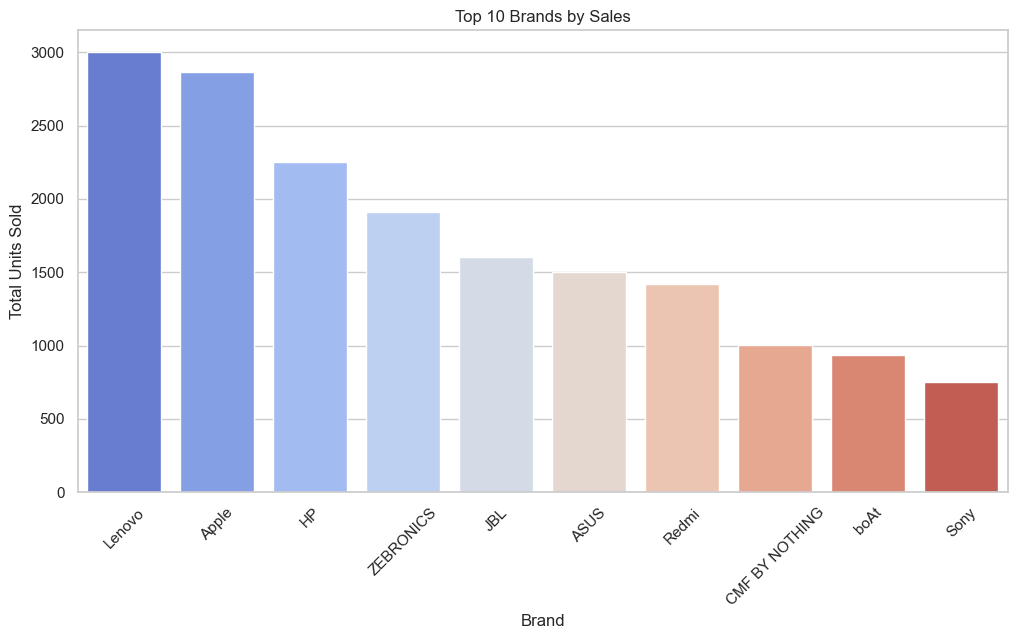

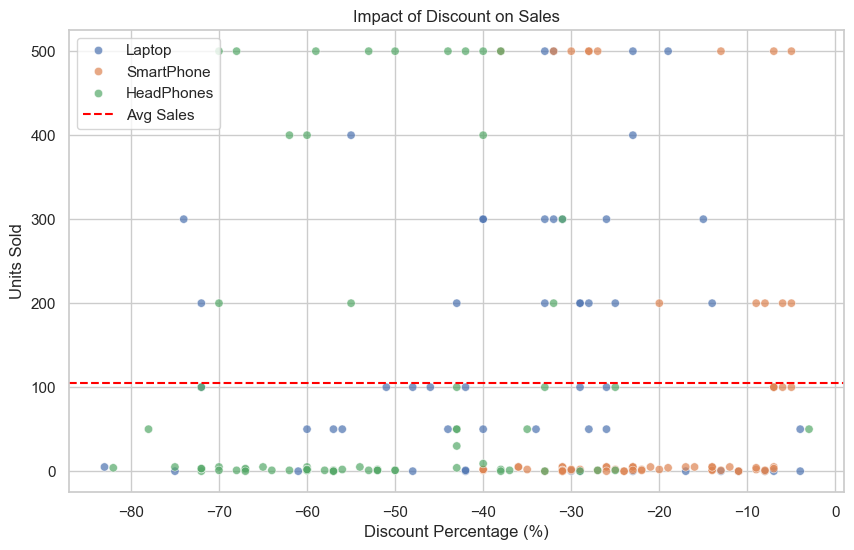

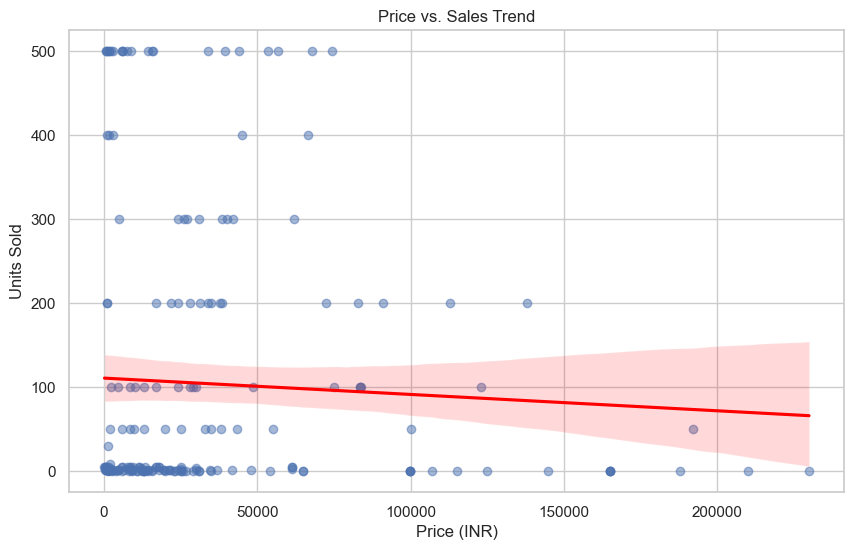

C:\Users\amart\AppData\Local\Temp\ipykernel_17136\1985243094.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rated['title'], x=top_rated['rating'], palette="magma")
C:\Users\amart\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


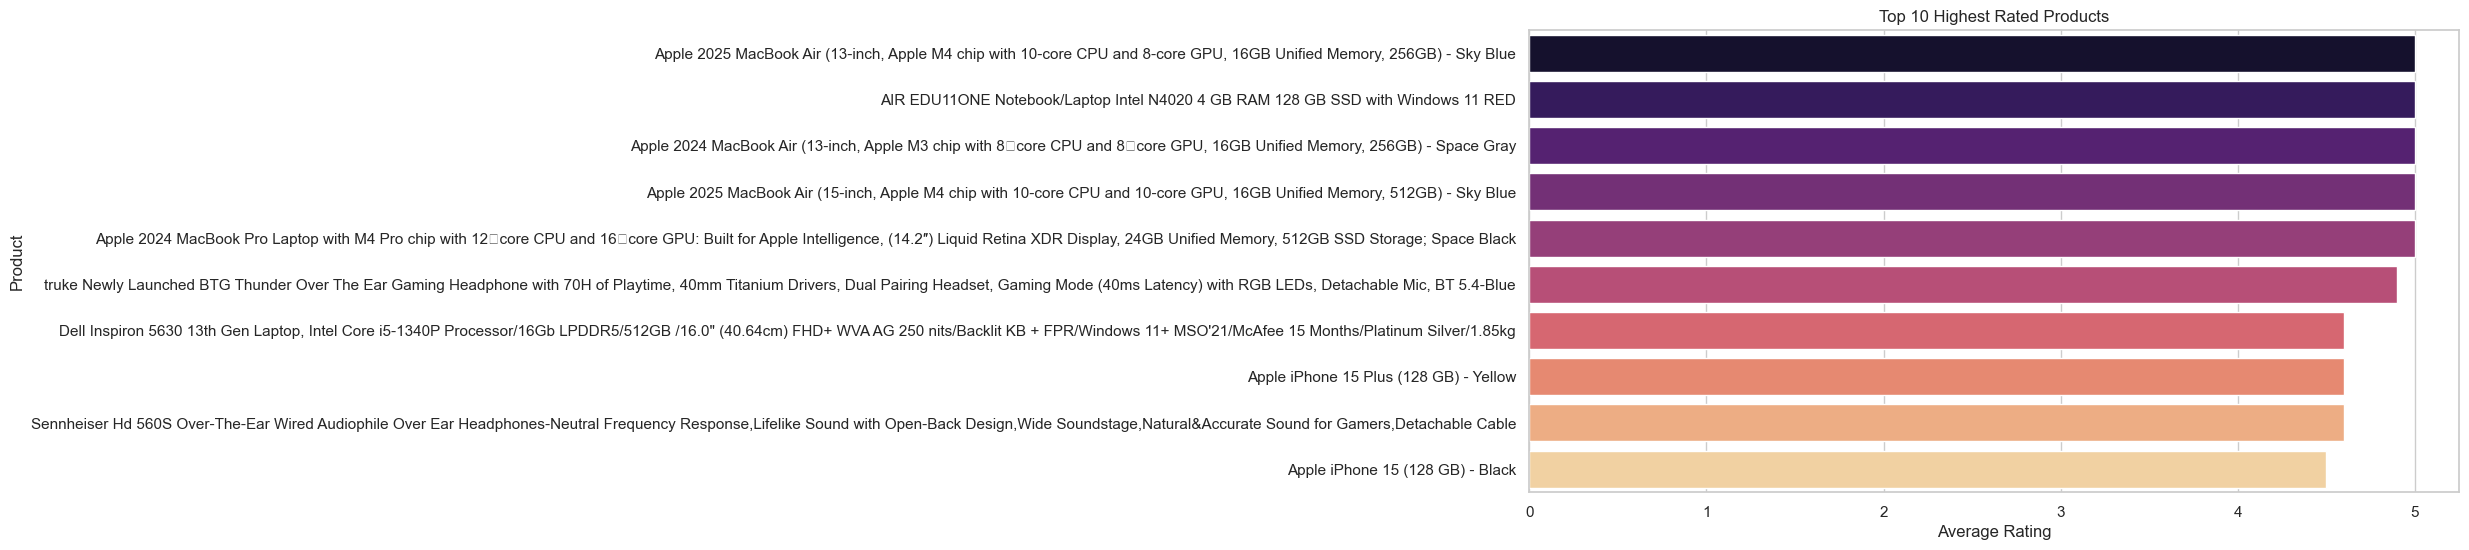

C:\Users\amart\AppData\Local\Temp\ipykernel_17136\1985243094.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['category'], y=df['rating'], palette="Set2")


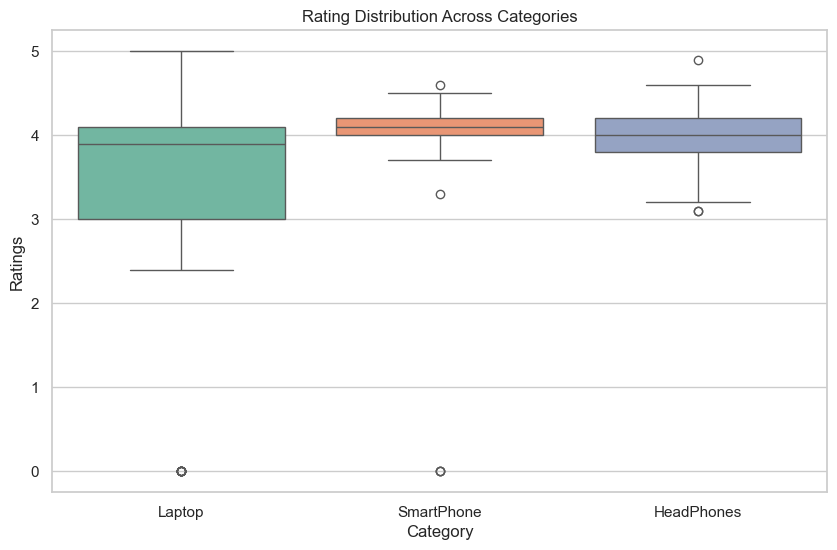

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/mnt/data/tech_gadgets_cleaned.csv"
df = pd.read_csv(file_path)

# Set a consistent style
sns.set_theme(style="whitegrid")

# 1. Top 10 Best-Selling Products
plt.figure(figsize=(12, 6))
top_selling = df.nlargest(10, 'bought')
sns.barplot(y=top_selling['title'], x=top_selling['bought'], palette="viridis")
plt.xlabel("Units Sold")
plt.ylabel("Product")
plt.title("Top 10 Best-Selling Products (Last Month)")
plt.show()

# **Insight:** These are the most popular products based on sales. Understanding their features and pricing can help in optimizing inventory and marketing.

# 2. Category-Wise Sales Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
category_sales = df.groupby('category')['bought'].sum()
category_sales.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.ylabel("")
plt.title("Category-Wise Sales Distribution")
plt.show()

# **Insight:** This shows which category (Laptops, Smartphones, Headphones) dominates the sales. If one category underperforms, promotional efforts can be focused there.

# 3. Brand-Wise Total Sales (Bar Chart)
plt.figure(figsize=(12, 6))
brand_sales = df.groupby('brand')['bought'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=brand_sales.index, y=brand_sales.values, palette="coolwarm")
plt.xlabel("Brand")
plt.ylabel("Total Units Sold")
plt.title("Top 10 Brands by Sales")
plt.xticks(rotation=45)
plt.show()

# **Insight:** Identifies the most successful brands. A brand with high sales but low ratings may need quality improvements.

# 4. Discount vs. Units Sold (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['off'], y=df['bought'], hue=df['category'], palette="deep", alpha=0.7)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Units Sold")
plt.title("Impact of Discount on Sales")
plt.axhline(df['bought'].mean(), color='red', linestyle="dashed", label="Avg Sales")
plt.legend()
plt.show()

# **Insight:** Determines whether higher discounts correlate with higher sales. If discounts boost sales significantly, pricing strategies can be optimized.

# 5. Price vs. Units Sold (Scatter Plot with Trendline)
plt.figure(figsize=(10, 6))
sns.regplot(x=df['price'], y=df['bought'], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Price (INR)")
plt.ylabel("Units Sold")
plt.title("Price vs. Sales Trend")
plt.show()

# **Insight:** Analyzes whether expensive or budget-friendly products sell more. If lower-priced products dominate, premium pricing strategies may need reevaluation.

# 6. Top 10 Highest Rated Products (Bar Chart)
plt.figure(figsize=(12, 6))
top_rated = df[df['rating'] > 0].nlargest(10, 'rating')
sns.barplot(y=top_rated['title'], x=top_rated['rating'], palette="magma")
plt.xlabel("Average Rating")
plt.ylabel("Product")
plt.title("Top 10 Highest Rated Products")
plt.show()

# **Insight:** Highlights customer-favorite products. These items can be featured in marketing campaigns or used as benchmarks for product improvements.

# 7. Rating Distribution Across Categories (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['category'], y=df['rating'], palette="Set2")
plt.xlabel("Category")
plt.ylabel("Ratings")
plt.title("Rating Distribution Across Categories")
plt.show()

# **Insight:** Shows the spread of customer ratings across different categories. If a category has consistently low ratings, quality improvements may be needed.